## Introduction: 
Our overall metric focuses on safety, so we decided to look at the dataset on fires to determine which neighborhood had the least amount of fires. Instead of fires, we wanted to do car accidents in each neighborhood at first, but we could not find datasets on this metric that contained information on the neighborhoods. 
## The Metric:
The dataset had information on all the fires that had occured since 2013 and included information on what neighborhood the fires were in. The neighborhood with the least amount of fires would be deemed the safest. I wanted to measure all of the big fires that were in each neighborhood, not just the smaller cooking fires to determine which neighborhood was the safest. 

In [2]:
#Import pandas and read in the data.
import pandas as pd
fires = pd.read_csv("Fires.csv")
fires.head(6)

,_id,call_no,incident_type,type_description,address,alarms,alarm_time,primary_unit,census_tract,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,F160029985,111.0,Building fire,"800 BLOCK CENTER ST, WILKINSBURG PA 15221",1,2016-04-21T05:01:04,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-16,40.441275,-79.882485
1,2,F180022058,111.0,Building fire,"1100 BLOCK JANE ST, WILKINSBURG PA 15221",1,2018-03-13T08:34:43,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-21,40.436342,-79.881003
2,3,F180022102,131.0,Passenger vehicle fire,"SB STATE HWY 28 SB AT 31S, PITTSBURGH PA 15212",0,2018-03-13T11:54:23,231EN32,2406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-1A,NaN,NaN
3,4,F170043431,131.0,Passenger vehicle fire,"1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212",0,2017-05-31T08:39:47,231EN38,2509.0,Fineview,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-10,40.460303,-80.006980
4,5,F180021111,111.0,Building fire,"2400 BLOCK VILLAGE RD, PITTSBURGH PA 15205",1,2018-03-09T10:26:42,231EN31,2808.0,Fairywood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-16,40.449009,-80.076607
5,6,F180021782,150.0,"Outside rubbish fire, Other","S 7TH ST & E CARSON ST, PITTSBURGH PA 15203",0,2018-03-12T09:13:28,231EN24,1702.0,South Side Flats,3.0,17.0,4.200317e+10,4.0,17.0,3.0,4-2,40.428618,-79.992239


In [3]:
#Exclude fires that are smaller, as they don't represent the overall quality of the neighborhood
type_mask = fires['type_description'] != 'Cooking fire, confined to container'
all_fires = fires[type_mask]
all_fires.head(10)

,_id,call_no,incident_type,type_description,address,alarms,alarm_time,primary_unit,census_tract,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,F160029985,111.0,Building fire,"800 BLOCK CENTER ST, WILKINSBURG PA 15221",1,2016-04-21T05:01:04,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-16,40.441275,-79.882485
1,2,F180022058,111.0,Building fire,"1100 BLOCK JANE ST, WILKINSBURG PA 15221",1,2018-03-13T08:34:43,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-21,40.436342,-79.881003
2,3,F180022102,131.0,Passenger vehicle fire,"SB STATE HWY 28 SB AT 31S, PITTSBURGH PA 15212",0,2018-03-13T11:54:23,231EN32,2406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-1A,NaN,NaN
3,4,F170043431,131.0,Passenger vehicle fire,"1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212",0,2017-05-31T08:39:47,231EN38,2509.0,Fineview,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-10,40.460303,-80.006980
4,5,F180021111,111.0,Building fire,"2400 BLOCK VILLAGE RD, PITTSBURGH PA 15205",1,2018-03-09T10:26:42,231EN31,2808.0,Fairywood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-16,40.449009,-80.076607
5,6,F180021782,150.0,"Outside rubbish fire, Other","S 7TH ST & E CARSON ST, PITTSBURGH PA 15203",0,2018-03-12T09:13:28,231EN24,1702.0,South Side Flats,3.0,17.0,4.200317e+10,4.0,17.0,3.0,4-2,40.428618,-79.992239
7,8,F180022546,111.0,Building fire,"7000 BLOCK LEMINGTON AVE, PITTSBURGH PA 15206",1,2018-03-14T23:49:22,231EN15,1203.0,Lincoln-Lemington-Belmar,9.0,12.0,4.200312e+10,2.0,12.0,5.0,3-18,40.471358,-79.898240
8,9,F180022773,111.0,Building fire,"100 BLOCK SPENCER AVE, PITTSBURGH PA 15227",1,2018-03-15T20:39:05,231EN23,2904.0,Carrick,4.0,29.0,4.200329e+10,4.0,29.0,3.0,4-15,40.385494,-79.977200
9,10,F170044316,131.0,Passenger vehicle fire,"1200 BLOCK WESTFIELD ST, PITTSBURGH PA 15216",0,2017-06-03T01:31:13,231EN28,1916.0,Beechview,4.0,19.0,4.200319e+10,5.0,19.0,6.0,4-28,40.415219,-80.019516
10,11,F130085568,151.0,"Outside rubbish, trash or waste fire","600 BLOCK LILLIAN ST, PITTSBURGH PA 15210",0,2013-11-30T09:18:34,231EN27,1803.0,Allentown,3.0,18.0,4.200318e+10,4.0,18.0,3.0,4-21,40.418484,-79.997177


In [66]:
#import pprint to format the output in a readable way
import pprint

#create a dictionary to count the number of times a neighborhood appears
neighbor_quant = {}
for index,row in all_fires.iterrows():
    neigh = row['neighborhood']
    if type(neigh) != float:
        if neigh in neighbor_quant:
            neighbor_quant[neigh] += 1
        else: 
            neighbor_quant[neigh] = 1

pprint.pprint(neighbor_quant)

{'Allegheny Center': 46,
 'Allegheny West': 41,
 'Allentown': 111,
 'Arlington': 48,
 'Arlington Heights': 6,
 'Banksville': 48,
 'Bedford Dwellings': 36,
 'Beechview': 137,
 'Beltzhoover': 123,
 'Bloomfield': 144,
 'Bluff': 128,
 'Bon Air': 21,
 'Brighton Heights': 130,
 'Brookline': 170,
 'California-Kirkbride': 38,
 'Carrick': 272,
 'Central Business District': 238,
 'Central Lawrenceville': 68,
 'Central Northside': 91,
 'Central Oakland': 77,
 'Chartiers City': 15,
 'Chateau': 43,
 'Crafton Heights': 63,
 'Crawford-Roberts': 77,
 'Duquesne Heights': 36,
 'East Allegheny': 108,
 'East Carnegie': 7,
 'East Hills': 116,
 'East Liberty': 158,
 'Elliott': 69,
 'Esplen': 21,
 'Fairywood': 20,
 'Fineview': 34,
 'Friendship': 24,
 'Garfield': 92,
 'Glen Hazel': 5,
 'Greenfield': 98,
 'Hays': 24,
 'Hazelwood': 215,
 'Highland Park': 63,
 'Homewood North': 168,
 'Homewood South': 169,
 'Homewood West': 52,
 'Knoxville': 172,
 'Larimer': 107,
 'Lincoln Place': 65,
 'Lincoln-Lemington-Belmar'

In [67]:
#sort the dictionary by the amount of times a neighborhood appears
sort = sorted(neighbor_quant.items(),key=lambda item: item[1], reverse=True)
pprint.pprint(sort)

[('Carrick', 272),
 ('Central Business District', 238),
 ('South Side Flats', 230),
 ('Hazelwood', 215),
 ('Mount Washington', 205),
 ('Squirrel Hill South', 198),
 ('Knoxville', 172),
 ('Brookline', 170),
 ('Homewood South', 169),
 ('Homewood North', 168),
 ('East Liberty', 158),
 ('Lincoln-Lemington-Belmar', 149),
 ('Bloomfield', 144),
 ('Sheraden', 141),
 ('Beechview', 137),
 ('Marshall-Shadeland', 137),
 ('Perry South', 133),
 ('Brighton Heights', 130),
 ('Bluff', 128),
 ('Shadyside', 124),
 ('Beltzhoover', 123),
 ('East Hills', 116),
 ('Allentown', 111),
 ('East Allegheny', 108),
 ('Larimer', 107),
 ('South Side Slopes', 104),
 ('Greenfield', 98),
 ('Spring Hill-City View', 96),
 ('Perry North', 93),
 ('Garfield', 92),
 ('Central Northside', 91),
 ('North Shore', 85),
 ('South Oakland', 85),
 ('Squirrel Hill North', 79),
 ('Crawford-Roberts', 77),
 ('North Oakland', 77),
 ('Central Oakland', 77),
 ('Troy Hill', 76),
 ('Middle Hill', 72),
 ('Elliott', 69),
 ('Manchester', 68),
 ('C

In [39]:
#get the number of different neighborhoods represented in the data
#exclude NaN
num_items = len(sort)
print(num_items)

91


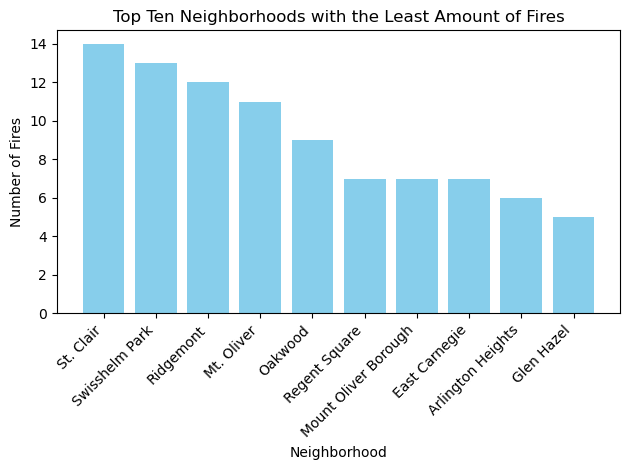

In [68]:
import matplotlib.pyplot as plt
# Creating a bar plot
top_ten = sort[81:91]
labels = [item[0] for item in top_ten]
values = [item[1] for item in top_ten]
plt.bar(labels, values, color='skyblue')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Fires')
plt.title('Top Ten Neighborhoods with the Least Amount of Fires')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

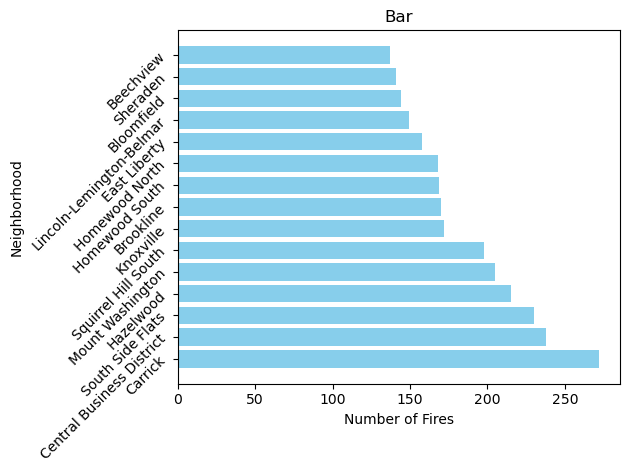

In [70]:
bottom_15 = sort[0:15]
labels = [item[0] for item in bottom_15]
values = [item[1] for item in bottom_15]
plt.barh(labels, values, color='skyblue')
plt.ylabel('Neighborhood')
plt.xlabel('Number of Fires')
plt.title('Bar')
plt.yticks(rotation=45, fontsize=10)
plt.tight_layout()

## Best Neighborhood:
The best neighborhood with the least amount of big fires would be Glen Hazel based on this metric. The bar graph shows that out of the top ten neighborhoods with the least amount of fires, Glen Hazel wins with only 5 large fires in the last 12 years. 
## Conclusion: 
Generally speaking, I don't really think about how likely it is for a place or neighborhood to get set on fire, so while I haven't been to Glen Hazel, it probably would not be my favorite neighborhood. Usually, I look for nieghborhoods with good restuarants or stores to consider my favorite neighborhood, rather than the neighborhood which has had the least amount of fires since 2013. However, I think it is important to note that I probably would not like any nieghborhood I went to if I saw/was in a fire at that neighborhood and I do value the fact that Glen Hazel should be safer in that sense. I think my favorite neighborhood is Squirrel Hill because I like the restuarants there; however, Squirrel Hill South had 6th most amount of fires since 2013.